## TapDanceDecoder: MVP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,roc_curve, auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Get Data

In [2]:
tap_df = pd.read_csv('../../Source/Data/Train_data_n40.csv')

In [3]:
tap_df.head()

,Unnamed: 0,Path,Labels,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,0,../../Source/Clean_train_clips/Shuffle/1/1.wav,1,-152.435155,78.311769,-106.482258,40.668131,-6.848575,-13.537377,-25.102485,...,-5.715126,3.448673,-3.931357,0.312252,-4.900849,0.567527,-0.794021,0.312240,-2.312006,0.874418
1,1,../../Source/Clean_train_clips/Shuffle/1/10.wav,1,-143.991075,65.523449,-102.436753,32.133732,-7.930019,-3.615873,-29.871724,...,-7.490636,2.765985,-4.232596,-1.305293,-2.874771,-0.598329,-2.664296,-0.350995,-2.788052,2.655818
2,2,../../Source/Clean_train_clips/Shuffle/1/11.wav,1,-129.072670,59.774233,-97.656748,35.739948,-4.885226,-0.900206,-23.750029,...,-5.315020,0.015977,-4.618710,2.864423,-7.207227,1.359400,-1.708778,-1.065044,-6.418154,2.256891
3,3,../../Source/Clean_train_clips/Shuffle/1/12.wav,1,-157.448416,71.945819,-105.594077,33.904608,-1.771036,-8.738653,-30.610143,...,-6.601130,2.409593,-3.244895,-0.032112,-4.747304,-2.054789,-2.822628,-0.939766,-2.482831,0.308946
4,4,../../Source/Clean_train_clips/Shuffle/1/13.wav,1,-182.069789,83.063060,-97.683985,32.842908,3.010242,5.194879,-24.979170,...,-7.428783,1.057461,-5.702909,1.172944,-5.609942,-0.255264,-3.029310,-0.558876,-4.378897,0.818755


## Quick & dirty test with a little bit of data

### LogReg it like you mean it!

In [4]:
data = tap_df.iloc[:,3:].values
labels = tap_df['Labels']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
predict = logreg.predict(X_test)
proba = logreg.predict_proba(X_test)

In [8]:
results = pd.DataFrame()
results['True'] = y_test.values
results['Predict_lr'] = predict
results['Prob_0_lr'] = proba[:,0]

In [9]:
results

,True,Predict_lr,Prob_0_lr
0,0,0,0.997712
1,1,1,0.131990
2,1,1,0.066129
3,1,1,0.000032
4,1,1,0.491151
5,1,1,0.004734
6,1,1,0.014014
7,0,0,0.999999
8,0,0,0.998658
9,1,0,0.971510


In [10]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict)))

Accuracy score: 0.8446601941747572


### YAAAAAAAAASSSSSS QUEEN!

Note: Input data is based on the original (not normalized) files and n_ MFC coefficients

### Visualizing results

In [20]:
def ROC_plot (testname, y_true, y_prob):
    
    logit_roc_auc = roc_auc_score(y_true, y_prob)
    
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', size=20)
    plt.ylabel('True Positive Rate', size=20)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('ROC: ' + testname, size=25)
    
    plt.show()
    print ('ROC_AUC_Score: ' + str(logit_roc_auc))

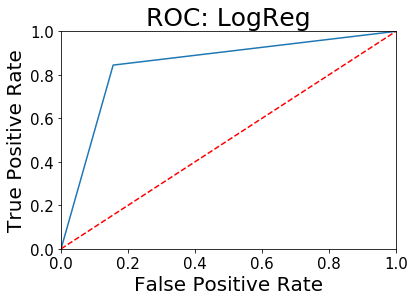

ROC_AUC_Score: 0.8446360153256705


In [21]:
ROC_plot('LogReg',  y_test.values, predict )

## Can't see the forest for the trees.... Random Forest Classifier

In [22]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1) # Just using these values from the book
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
predict_rf = rnd_clf.predict(X_test)
proba_rf = rnd_clf.predict_proba(X_test)

In [24]:
results['Predict_rf'] = predict_rf
results['Prob_0_rf'] = proba_rf[:,0]

In [25]:
results

,True,Predict_lr,Prob_0_lr,Predict_rf,Prob_0_rf
0,0,0,0.997712,0,0.716630
1,1,1,0.131990,1,0.156053
2,1,1,0.066129,1,0.213290
3,1,1,0.000032,1,0.089407
4,1,1,0.491151,1,0.379822
5,1,1,0.004734,1,0.234813
6,1,1,0.014014,1,0.352563
7,0,0,0.999999,0,0.761773
8,0,0,0.998658,0,0.872174
9,1,0,0.971510,1,0.216705


In [26]:
print('Accuracy score: ' + str(accuracy_score(y_test, predict_rf)))

Accuracy score: 0.9514563106796117


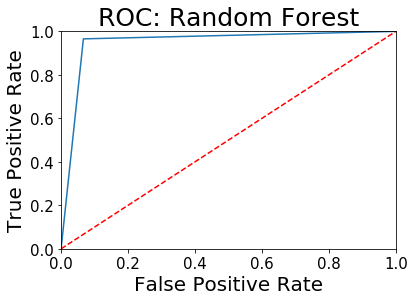

ROC_AUC_Score: 0.9494252873563219


In [27]:
ROC_plot('Random Forest', y_test.values, predict_rf)

In [28]:
#results.to_csv('../../Source/Data/Train_results_n40.csv', index=None)